In [75]:
import pandas as pd
pd.options.display.max_columns = 100
pd.options.display.max_colwidth = 500

pd.options.display.max_rows = 100


Importing that datasets I will be analysising for this project.

In [76]:
heartrate_seconds = pd.read_csv('Datasets/heartrate_seconds_merged.csv')
minuteSleep = pd.read_csv('Datasets/minuteSleep_merged.csv')
minuteSteps = pd.read_csv('Datasets/minuteStepsNarrow_merged.csv')

minuteSleep_num_rows = len(minuteSleep)
heartrate_seconds_num_rows = len(heartrate_seconds)
minuteSteps_num_rows = len(minuteSteps)

heartrate_seconds_num_rows




2483658

In [77]:
minuteSleep_num_rows = len(minuteSleep.query("value==3"))
minuteSleep_num_rows

2018

In [78]:
heartrate_seconds_unique_ids = heartrate_seconds['Id'].unique()
heartrate_seconds_unique_ids


array([2022484408, 2026352035, 2347167796, 4020332650, 4388161847,
       4558609924, 5553957443, 5577150313, 6117666160, 6775888955,
       6962181067, 7007744171, 8792009665, 8877689391], dtype=int64)

In [79]:
minuteSleep_unique_ids = minuteSleep['Id'].unique()
minuteSleep_unique_ids

array([1503960366, 1644430081, 1844505072, 1927972279, 2026352035,
       2320127002, 2347167796, 3977333714, 4020332650, 4319703577,
       4388161847, 4445114986, 4558609924, 4702921684, 5553957443,
       5577150313, 6117666160, 6775888955, 6962181067, 7007744171,
       7086361926, 8053475328, 8378563200, 8792009665], dtype=int64)

In [80]:
minuteSteps_unique_ids = minuteSteps['Id'].unique()
minuteSteps_unique_ids


array([1503960366, 1624580081, 1644430081, 1844505072, 1927972279,
       2022484408, 2026352035, 2320127002, 2347167796, 2873212765,
       3372868164, 3977333714, 4020332650, 4057192912, 4319703577,
       4388161847, 4445114986, 4558609924, 4702921684, 5553957443,
       5577150313, 6117666160, 6290855005, 6775888955, 6962181067,
       7007744171, 7086361926, 8053475328, 8253242879, 8378563200,
       8583815059, 8792009665, 8877689391], dtype=int64)

In [81]:
set1 = set(heartrate_seconds_unique_ids)
set2 = set(minuteSleep_unique_ids)
set3 = set(minuteSteps_unique_ids)

# Find common elements
common_ids = set1.intersection(set2, set3)

# If needed, convert the set back to a list
common_ids_list = list(common_ids)

common_ids_list

[8792009665,
 5553957443,
 4558609924,
 2026352035,
 5577150313,
 4020332650,
 6962181067,
 7007744171,
 6117666160,
 2347167796,
 4388161847,
 6775888955]

In [82]:
# Convert to datetime format
minuteSleep['date'] = pd.to_datetime(minuteSleep['date'], format='%m/%d/%Y %I:%M:%S %p')
minuteSteps['ActivityMinute'] = pd.to_datetime(minuteSteps['ActivityMinute'], format='%m/%d/%Y %I:%M:%S %p')

In [83]:
minuteSteps.rename(columns={'ActivityMinute': 'date'}, inplace=True)
minuteSleep.rename(columns={'value': 'SleepStage'}, inplace=True)

In [84]:
heartrate_seconds['Time'] = pd.to_datetime(heartrate_seconds['Time'], format='%m/%d/%Y %I:%M:%S %p')

heartrate_minutes = (
    heartrate_seconds
    .groupby(['Id', heartrate_seconds['Time'].dt.floor('T')])
    .agg({'Value': 'mean'})
    .reset_index()
)

# Rename columns for clarity, if needed
heartrate_minutes.columns = ['Id', 'DateTime', 'Avg Heart Rate Per Minute']
heartrate_minutes

,Id,DateTime,Avg Heart Rate Per Minute
0,2022484408,2016-04-12 07:21:00,101.600000
1,2022484408,2016-04-12 07:22:00,87.888889
2,2022484408,2016-04-12 07:23:00,58.000000
3,2022484408,2016-04-12 07:24:00,58.000000
4,2022484408,2016-04-12 07:25:00,56.777778
...,...,...,...
333415,8877689391,2016-05-12 14:40:00,56.222222
333416,8877689391,2016-05-12 14:41:00,57.857143
333417,8877689391,2016-05-12 14:42:00,56.000000
333418,8877689391,2016-05-12 14:43:00,57.500000


In [85]:
heartrate_minutes['DateTime'] = heartrate_minutes['DateTime'].astype(str)

heartrate_minutes_split_time = heartrate_minutes['DateTime'].str.split(' ', expand=True)

rename_columns = {
    0: 'Date',
    1: 'Time',
    2: 'AM/PM'
}

heartrate_minutes_split_time = heartrate_minutes_split_time.rename(columns=rename_columns)

# Convert 'Date' column back to datetime format
heartrate_minutes_split_time.loc[:, 'Date'] = pd.to_datetime(heartrate_minutes_split_time.loc[:, 'Date'])

# Merge the split date and time information back into the original DataFrame
merged_data = pd.merge(
    left=heartrate_minutes.drop(columns='DateTime'), 
    right=heartrate_minutes_split_time, 
    left_index=True, 
    right_index=True
)

heartrate_minutes = merged_data

In [86]:
id_to_name = {2022484408: 'Alice', 2026352035: 'Bob', 2347167796: 'Charlie', 4020332650: 'James', 4388161847: 'Conor', 4558609924: 'Duncan', 5553957443: 'Joe',
              5577150313: 'Ben', 6117666160: 'Theo', 6775888955: 'Aaron', 6962181067: 'Catriona', 7007744171: 'April', 8792009665: 'Chloe', 8877689391: 'John'}
heartrate_minutes['Names'] = heartrate_minutes['Id'].map(id_to_name)
heartrate_minutes

,Id,Avg Heart Rate Per Minute,Date,Time,Names
0,2022484408,101.600000,2016-04-12 00:00:00,07:21:00,Alice
1,2022484408,87.888889,2016-04-12 00:00:00,07:22:00,Alice
2,2022484408,58.000000,2016-04-12 00:00:00,07:23:00,Alice
3,2022484408,58.000000,2016-04-12 00:00:00,07:24:00,Alice
4,2022484408,56.777778,2016-04-12 00:00:00,07:25:00,Alice
...,...,...,...,...,...
333415,8877689391,56.222222,2016-05-12 00:00:00,14:40:00,John
333416,8877689391,57.857143,2016-05-12 00:00:00,14:41:00,John
333417,8877689391,56.000000,2016-05-12 00:00:00,14:42:00,John
333418,8877689391,57.500000,2016-05-12 00:00:00,14:43:00,John


In [87]:
import matplotlib.pyplot as plt

In [88]:

heartrate_hours = heartrate_minutes.copy()

heartrate_hours['Datetime'] = pd.to_datetime(heartrate_hours['Date'].astype(str) + ' ' + heartrate_hours['Time'].astype(str))
heartrate_hours['Hour'] = heartrate_hours['Datetime'].dt.hour

hourly_data = heartrate_hours.groupby(['Names', 'Date', 'Hour'])['Avg Heart Rate Per Minute'].mean().reset_index()

sampled_names = ['Conor', 'Ben', 'Catriona', 'Charlie', 'Chloe']
sampled_individuals = heartrate_hours[heartrate_hours['Names'].isin(sampled_names)]

plt.figure(figsize=(15, 7))

for individual in sampled_individuals['Names'].unique():
    individual_data = hourly_data[hourly_data['Names'] == individual]
    plt.plot(pd.to_datetime(individual_data['Date'].astype(str) + ' ' + individual_data['Hour'].astype(str) + ':00:00'), 
             individual_data['Avg Heart Rate Per Minute'], 
             label=individual)

plt.title('Average Heart Rate Per Hour for Sampled Individuals')
plt.xlabel('Date and Time')
plt.ylabel('Average Heart Rate Per Hour')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate basic statistics for the sampled individuals
mean_hr = sampled_individuals['Avg Heart Rate Per Minute'].mean()
std_dev = sampled_individuals['Avg Heart Rate Per Minute'].std()
min_hr = sampled_individuals['Avg Heart Rate Per Minute'].min()
max_hr = sampled_individuals['Avg Heart Rate Per Minute'].max()
median_hr = sampled_individuals['Avg Heart Rate Per Minute'].median()
percentile_25 = sampled_individuals['Avg Heart Rate Per Minute'].quantile(0.25)
percentile_75 = sampled_individuals['Avg Heart Rate Per Minute'].quantile(0.75)

# Display the statistics
print(f"Basic Statistical Summary for Sampled Individuals:\n")
print(f"Mean (Average) Heart Rate: {mean_hr:.2f} beats per minute")
print(f"Standard Deviation: {std_dev:.2f}")
print(f"Minimum Heart Rate: {min_hr} beats per minute")
print(f"Maximum Heart Rate: {max_hr} beats per minute")
print(f"Median (50th percentile) Heart Rate: {median_hr} beats per minute")
print(f"25th Percentile: {percentile_25:.2f} beats per minute")
print(f"75th Percentile: {percentile_75:.2f} beats per minute")

C:\Users\c_bro\AppData\Local\Temp\ipykernel_15492\1689476251.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  heartrate_hours['Datetime'] = pd.to_datetime(heartrate_hours['Date'].astype(str) + ' ' + heartrate_hours['Time'].astype(str))


KeyboardInterrupt: 

In [ ]:
heartrate_hour = heartrate_minutes.copy()
heartrate_hour

,Id,Avg Heart Rate Per Minute,Date,Time,Names
0,2022484408,101.600000,2016-04-12 00:00:00,07:21:00,Alice
1,2022484408,87.888889,2016-04-12 00:00:00,07:22:00,Alice
2,2022484408,58.000000,2016-04-12 00:00:00,07:23:00,Alice
3,2022484408,58.000000,2016-04-12 00:00:00,07:24:00,Alice
4,2022484408,56.777778,2016-04-12 00:00:00,07:25:00,Alice
...,...,...,...,...,...
333415,8877689391,56.222222,2016-05-12 00:00:00,14:40:00,John
333416,8877689391,57.857143,2016-05-12 00:00:00,14:41:00,John
333417,8877689391,56.000000,2016-05-12 00:00:00,14:42:00,John
333418,8877689391,57.500000,2016-05-12 00:00:00,14:43:00,John


In [ ]:
heartrate_hour = heartrate_minutes.copy()

# Convert to datetime with the specified format
datetime_str = heartrate_hour['Datetime'] = pd.to_datetime(heartrate_hour['Date'].astype(str) + ' ' + heartrate_hour['Time'].astype(str))
heartrate_hour['Datetime'] = pd.to_datetime(datetime_str, format='%Y-%m-%d %H:%M:%S')

heartrate_hour['Hour'] = heartrate_hour['Datetime'].dt.hour

hourly_data = heartrate_hour.groupby(['Names', 'Date', 'Hour'])['Avg Heart Rate Per Minute'].mean().reset_index()

# Filter for a specific date for Joe
specific_date = "2016-04-13"
joe_data = hourly_data[(hourly_data['Names'] == 'Joe') & (hourly_data['Date'] == specific_date)]

# Plotting the data for Joe
plt.figure(figsize=(15, 7))
plt.plot(pd.to_datetime(joe_data['Date'].astype(str) + ' ' + joe_data['Hour'].astype(str) + ':00:00'), 
         joe_data['Avg Heart Rate Per Minute'], 
         label='Joe', color='blue')

plt.title(f'Average Heart Rate Per Hour on {specific_date} for Joe')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Heart Rate Per Hour')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

mean_hr = joe_data['Avg Heart Rate Per Minute'].mean()
std_dev = joe_data['Avg Heart Rate Per Minute'].std()
min_hr = joe_data['Avg Heart Rate Per Minute'].min()
max_hr = joe_data['Avg Heart Rate Per Minute'].max()
median_hr = joe_data['Avg Heart Rate Per Minute'].median()
percentile_25 = joe_data['Avg Heart Rate Per Minute'].quantile(0.25)
percentile_75 = joe_data['Avg Heart Rate Per Minute'].quantile(0.75)

# Display the statistics
print(f"Basic Statistical Summary for Joe on {specific_date}:\n")
print(f"Mean (Average) Heart Rate: {mean_hr:.2f} beats per minute")
print(f"Standard Deviation: {std_dev:.2f}")
print(f"Minimum Heart Rate: {min_hr} beats per minute")
print(f"Maximum Heart Rate: {max_hr} beats per minute")
print(f"Median (50th percentile) Heart Rate: {median_hr} beats per minute")
print(f"25th Percentile: {percentile_25:.2f} beats per minute")
print(f"75th Percentile: {percentile_75:.2f} beats per minute")

C:\Users\c_bro\AppData\Local\Temp\ipykernel_15492\643720251.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  datetime_str = heartrate_hour['Datetime'] = pd.to_datetime(heartrate_hour['Date'].astype(str) + ' ' + heartrate_hour['Time'].astype(str))


KeyboardInterrupt: 

In [89]:
minuteSleep.drop(columns=['logId'], inplace=True)

In [90]:
one_count = (minuteSleep['SleepStage'] == 1).sum() # 172480
two_count = (minuteSleep['SleepStage'] == 2).sum() # 14023
three_count = (minuteSleep['SleepStage'] == 3).sum() #2018

In [91]:
minuteSleep

,Id,date,SleepStage
0,1503960366,2016-04-12 02:47:30,3
1,1503960366,2016-04-12 02:48:30,2
2,1503960366,2016-04-12 02:49:30,1
3,1503960366,2016-04-12 02:50:30,1
4,1503960366,2016-04-12 02:51:30,1
...,...,...,...
188516,8792009665,2016-05-04 09:59:00,1
188517,8792009665,2016-05-04 10:00:00,1
188518,8792009665,2016-05-04 10:01:00,1
188519,8792009665,2016-05-04 10:02:00,1


In [92]:
sleep_stages = {
    1: 'Awake',
    2: 'REM',
    3: 'Deep Sleep'
}

# Apply the mapping to the 'SleepStage' column
minuteSleep['SleepStage'] = minuteSleep['SleepStage'].replace(sleep_stages)
minuteSleep

,Id,date,SleepStage
0,1503960366,2016-04-12 02:47:30,Deep Sleep
1,1503960366,2016-04-12 02:48:30,REM
2,1503960366,2016-04-12 02:49:30,Awake
3,1503960366,2016-04-12 02:50:30,Awake
4,1503960366,2016-04-12 02:51:30,Awake
...,...,...,...
188516,8792009665,2016-05-04 09:59:00,Awake
188517,8792009665,2016-05-04 10:00:00,Awake
188518,8792009665,2016-05-04 10:01:00,Awake
188519,8792009665,2016-05-04 10:02:00,Awake


In [94]:
minuteSleepCopy = minuteSleep.copy()
minuteSleepCopy['day'] = minuteSleepCopy['date'].dt.date

sleep_duration = minuteSleepCopy.groupby(['Id', 'day', 'SleepStage']).size().reset_index(name='Duration_minutes')

sleep_duration

,Id,day,SleepStage,Duration_minutes
0,1503960366,2016-04-12,Awake,327
1,1503960366,2016-04-12,Deep Sleep,6
2,1503960366,2016-04-12,REM,13
3,1503960366,2016-04-13,Awake,384
4,1503960366,2016-04-13,Deep Sleep,12
...,...,...,...,...
1222,8792009665,2016-05-03,Deep Sleep,2
1223,8792009665,2016-05-03,REM,27
1224,8792009665,2016-05-04,Awake,439
1225,8792009665,2016-05-04,Deep Sleep,2


In [ ]:
total_sleep = minuteSleepCopy.groupby(['Id', 'day']).size().reset_index(name='Total_minutes')

# Merge total_sleep with sleep_duration to have the total sleep time on each row
sleep_duration = sleep_duration.merge(total_sleep, on=['Id', 'day'])

# Calculate the percentage
sleep_duration['Percentage'] = (sleep_duration['Duration_minutes'] / sleep_duration['Total_minutes']) * 100


In [99]:
sleep_duration.drop(columns=['Total_minutes_x'], inplace=True)
sleep_duration.drop(columns=['Total_minutes_y'], inplace=True)
sleep_duration

,Id,day,SleepStage,Duration_minutes,Percentage,Total_minutes
0,1503960366,2016-04-12,Awake,327,94.508671,346
1,1503960366,2016-04-12,Deep Sleep,6,1.734104,346
2,1503960366,2016-04-12,REM,13,3.757225,346
3,1503960366,2016-04-13,Awake,384,94.348894,407
4,1503960366,2016-04-13,Deep Sleep,12,2.948403,407
...,...,...,...,...,...,...
1222,8792009665,2016-05-03,Deep Sleep,2,0.366972,545
1223,8792009665,2016-05-03,REM,27,4.954128,545
1224,8792009665,2016-05-04,Awake,439,94.816415,463
1225,8792009665,2016-05-04,Deep Sleep,2,0.431965,463


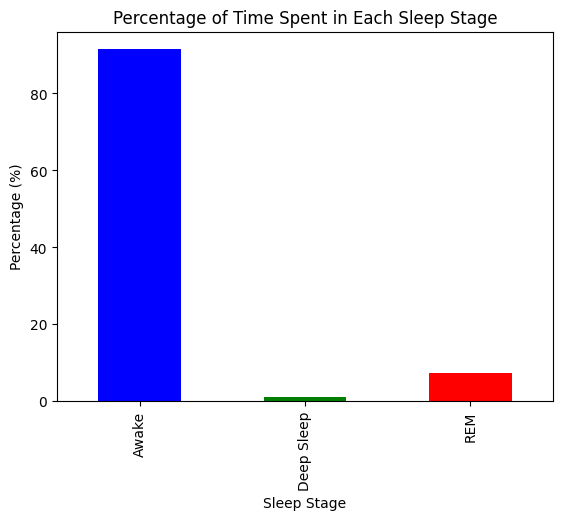

In [100]:
total_minutes_per_stage = sleep_duration.groupby('SleepStage')['Duration_minutes'].sum()

total_minutes = total_minutes_per_stage.sum()

percentage_per_stage = (total_minutes_per_stage / total_minutes) * 100

percentage_per_stage.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Percentage of Time Spent in Each Sleep Stage')
plt.ylabel('Percentage (%)')
plt.xlabel('Sleep Stage')
plt.show()